In [74]:
import os
from tqdm.notebook import tqdm
import cv2
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
from matplotlib import pyplot as plt
import numpy as np
init_notebook_mode(True)

In [75]:
!ls ../../datasets/SeaDroneSee

SeaDroneSee.yaml  dataset-metadata.json  label_map.txt	test  train  val


In [76]:
!cat ../../datasets/SeaDroneSee/label_map.txt

swimmer
floater
boat
swimmer_on_boat
floater_on_boat
life_jacket

In [77]:
!ls ../../datasets/SeaDroneSee/train/

annotations  images  labels  labels.cache


In [78]:
!cat ../../datasets/SeaDroneSee/train/annotations/instances_train.json

{"info": {"year": "2021", "version": "1", "description": "", "contributor": "", "url": "localhost", "date_created": "2021-03-09T14:46:29.550943"}, "licenses": [{"id": 1, "url": "", "name": "Unknown"}], "categories": [{"supercategory": "ignored", "id": 7, "name": "ignored region"}, {"supercategory": "person", "id": 1, "name": "swimmer"}, {"supercategory": "person", "id": 2, "name": "floater"}, {"supercategory": "person", "id": 4, "name": "swimmer on boat"}, {"supercategory": "person", "id": 5, "name": "floater on boat"}, {"supercategory": "boat", "id": 3, "name": "boat"}, {"supercategory": "lifejacket", "id": 6, "name": "life jacket"}], "images": [{"id": 2088, "file_name": "2088.png", "height": 2160, "width": 3840, "source": {"drone": "mavic", "folder_name": "DJI_0057", "video": "DJI_0057.MP4", "frame_no": 0}, "date_time": "2020-08-27T14:18:12", "meta": {"date_time": "2020-08-27T12:18:12", "gps_latitude": 47.671755, "gps_latitude_ref": "N", "gps_longitude": 9.269907, "gps_longitude_ref"

_name": "3718.png", "height": 2160, "width": 3840, "source": {"drone": "mavic", "folder_name": "DJI_0038", "video": "DJI_0038.MP4", "frame_no": 3450}, "date_time": "2020-08-25T14:45:10.115000", "meta": {"date_time": "2020-08-25T12:45:10", "gps_latitude": 47.672727, "gps_latitude_ref": "N", "gps_longitude": 9.269031, "gps_longitude_ref": "E", "altitude": 40.198039622066446, "gimbal_pitch": 34.1, "compass_heading": 284.7, "gimbal_heading": 279.5, "speed": 0.0, "xspeed": 0.0, "yspeed": 0.0, "zspeed": 0.0}}, {"id": 3719, "file_name": "3719.png", "height": 2160, "width": 3840, "source": {"drone": "mavic", "folder_name": "DJI_0038", "video": "DJI_0038.MP4", "frame_no": 3465}, "date_time": "2020-08-25T14:45:10.615500", "meta": {"date_time": "2020-08-25T12:45:11", "gps_latitude": 47.672726000000004, "gps_latitude_ref": "N", "gps_longitude": 9.26903, "gps_longitude_ref": "E", "altitude": 40.09804449862847, "gimbal_pitch": 34.1, "compass_heading": 284.9, "gimbal_heading": 279.5, "speed": 0.0, "x

 0.0, "xspeed": 0.0, "yspeed": 0.0, "zspeed": 0.0}}, {"id": 5090, "file_name": "5090.png", "height": 2160, "width": 3840, "source": {"drone": "m100", "folder_name": "DJI_0001", "video": "DJI_0001.MOV", "frame_no": 1455}, "date_time": "2020-08-28T14:02:29.581867", "meta": {"date_time": "2020-08-28T12:02:30", "gps_latitude": 47.672569491021, "gps_latitude_ref": "N", "gps_longitude": 9.26903151336284, "gps_longitude_ref": "E", "altitude": 40.7980103626943, "gimbal_pitch": 58.1, "compass_heading": 358.8, "gimbal_heading": 356.3, "speed": 0.0, "xspeed": 0.0, "yspeed": 0.0, "zspeed": 0.0}}, {"id": 5091, "file_name": "5091.png", "height": 2160, "width": 3840, "source": {"drone": "m100", "folder_name": "DJI_0001", "video": "DJI_0001.MOV", "frame_no": 1470}, "date_time": "2020-08-28T14:02:30.082367", "meta": {"date_time": "2020-08-28T12:02:30", "gps_latitude": 47.67256964819629, "gps_latitude_ref": "N", "gps_longitude": 9.269030269034179, "gps_longitude_ref": "E", "altitude": 40.7980103626943, 

56072222223, "gps_longitude_ref": "E", "altitude": 54.355999999999995, "gimbal_pitch": 90.0, "speed": -1, "xspeed": -1, "yspeed": -1, "zspeed": -1}, "source": {"drone": "trinity", "folder_name": "rgb", "image_name": "DSC00222.jpg"}}, {"id": 1447, "file_name": "1447.png", "height": 3632, "width": 5456, "frame": "DSC01583.jpg", "meta": {"date_time": "2020-08-25T13:06:20", "gps_latitude": 47.67231262222222, "gps_latitude_ref": "N", "gps_longitude": 9.268962430555556, "gps_longitude_ref": "E", "altitude": 88.363, "gimbal_pitch": 90.0, "speed": -1, "xspeed": -1, "yspeed": -1, "zspeed": -1}, "source": {"drone": "trinity", "folder_name": "rgb", "image_name": "DSC01583.jpg"}}, {"id": 544, "file_name": "544.png", "height": 3632, "width": 5456, "frame": "DSC01147.jpg", "meta": {"date_time": "2020-08-27T12:57:09", "gps_latitude": 47.67275723333333, "gps_latitude_ref": "N", "gps_longitude": 9.269896502777778, "gps_longitude_ref": "E", "altitude": 238.79499999999996, "gimbal_pitch": 90.0, "speed": 

ory_id": 4}, {"id": 19129, "image_id": 3189, "bbox": [168, 1598, 616, 454], "area": 279664, "category_id": 3}, {"id": 19130, "image_id": 3189, "bbox": [1857, 1212, 440, 172], "area": 75680, "category_id": 3}, {"id": 19131, "image_id": 3189, "bbox": [2320, 1192, 446, 117], "area": 52182, "category_id": 3}, {"id": 19132, "image_id": 3189, "bbox": [2104, 1173, 63, 85], "area": 5355, "category_id": 4}, {"id": 19133, "image_id": 3189, "bbox": [2650, 1163, 72, 85], "area": 6120, "category_id": 5}, {"id": 19134, "image_id": 3189, "bbox": [2412, 1124, 59, 115], "area": 6785, "category_id": 5}, {"id": 19135, "image_id": 3189, "bbox": [2120, 1238, 57, 65], "area": 3705, "category_id": 4}, {"id": 19136, "image_id": 3189, "bbox": [2722, 1330, 47, 53], "area": 2491, "category_id": 2}, {"id": 19137, "image_id": 3189, "bbox": [2702, 1424, 64, 71], "area": 4544, "category_id": 1}, {"id": 19138, "image_id": 3189, "bbox": [1979, 1194, 69, 97], "area": 6693, "category_id": 4}, {"id": 19139, "image_id": 3

, "image_id": 3937, "bbox": [755, 1076, 121, 118], "area": 14278, "category_id": 3}, {"id": 24696, "image_id": 3937, "bbox": [448, 1583, 34, 38], "area": 1292, "category_id": 2}, {"id": 24697, "image_id": 3937, "bbox": [2197, 778, 30, 55], "area": 1650, "category_id": 4}, {"id": 24698, "image_id": 3937, "bbox": [1045, 1216, 193, 110], "area": 21230, "category_id": 3}, {"id": 24699, "image_id": 3937, "bbox": [2069, 775, 23, 34], "area": 782, "category_id": 4}, {"id": 24700, "image_id": 3937, "bbox": [2042, 783, 204, 57], "area": 11628, "category_id": 3}, {"id": 24701, "image_id": 3938, "bbox": [155, 1560, 37, 39], "area": 1443, "category_id": 2}, {"id": 24702, "image_id": 3938, "bbox": [739, 1085, 123, 115], "area": 14145, "category_id": 3}, {"id": 24703, "image_id": 3938, "bbox": [428, 1606, 36, 41], "area": 1476, "category_id": 2}, {"id": 24704, "image_id": 3938, "bbox": [2198, 768, 31, 54], "area": 1674, "category_id": 4}, {"id": 24705, "image_id": 3938, "bbox": [1037, 1176, 194, 165

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [79]:
!ls ../../datasets/SeaDroneSee/train/images  

10.png	  1613.png  2224.png  3226.png	3774.png  4372.png  4944.png  5334.png
1000.png  1614.png  2225.png  3227.png	3775.png  4373.png  4945.png  5335.png
1001.png  1615.png  2226.png  3228.png	3776.png  4374.png  4946.png  5336.png
1002.png  1616.png  2227.png  3229.png	3777.png  4375.png  4947.png  5337.png
1003.png  1617.png  2228.png  3230.png	3778.png  4376.png  4948.png  5338.png
1004.png  1618.png  2229.png  3231.png	3779.png  4377.png  4949.png  5339.png
1005.png  1623.png  2230.png  3232.png	378.png   4378.png  4950.png  534.png
1007.png  1626.png  2231.png  3233.png	3780.png  4379.png  4951.png  5340.png
1008.png  1628.png  2232.png  3234.png	3781.png  438.png   497.png   5341.png
1009.png  1629.png  2233.png  3235.png	3782.png  4380.png  498.png   5342.png
1010.png  163.png   2234.png  3236.png	38.png	  4381.png  499.png   5343.png
1011.png  1630.png  2235.png  3237.png	380.png   4382.png  4991.png  5344.png
1012.png  1632.png  2236.png  3238.png	381.png   4383.png  5.png   

In [80]:
!cat ../../datasets/SeaDroneSee/train/labels/14.txt

0 0.5821138211382114 0.10396570203644159 0.03577235772357724 0.01822079314040729
1 0.7780487804878049 0.10182207931404073 0.027642276422764227 0.02465166130760986
2 0.8073170731707318 0.4941050375133976 0.06910569105691057 0.12968917470525188


# Labels information

In [81]:
PATH = "../../datasets/SeaDroneSee/train/labels/"
files = os.listdir(PATH)

In [82]:
classes = dict()
NUM_CLASSES = 6
for i in range(NUM_CLASSES):
    classes[i] = 0
for file in tqdm(files):
    f = open(os.path.join(PATH, file)).readlines()
    for line in f:
        c = int(line.split(" ")[0])
        classes[c] += 1
print(classes)

  0%|          | 0/2975 [00:00<?, ?it/s]

{0: 2480, 1: 5963, 2: 7643, 3: 3501, 4: 1603, 5: 82}


In [83]:
class_map = dict()
class_map[0] = "swimmer"
class_map[1] = "floater"
class_map[2] = "boat"
class_map[3] = "swimmer_on_boat"
class_map[4] = "floater_on_boat"
class_map[5] = "life_jacket"

In [84]:
class_map

{0: 'swimmer',
 1: 'floater',
 2: 'boat',
 3: 'swimmer_on_boat',
 4: 'floater_on_boat',
 5: 'life_jacket'}

In [85]:
classes_mapped = {class_map[k]:v for k, v in classes.items()}
classes_mapped

{'swimmer': 2480,
 'floater': 5963,
 'boat': 7643,
 'swimmer_on_boat': 3501,
 'floater_on_boat': 1603,
 'life_jacket': 82}

In [86]:
classes_mapped.values()

dict_values([2480, 5963, 7643, 3501, 1603, 82])

In [87]:
fig = go.Figure(data=[go.Bar(y=list(classes_mapped.values()), x=list(classes_mapped.keys()))])
fig.show()

In [88]:
PATH

'../../datasets/SeaDroneSee/train/labels/'

# Image sizes

In [89]:
PATH_IMAGES = "../../datasets/SeaDroneSee/train/images"
images = os.listdir(PATH_IMAGES)
width, height = [], []
for image in tqdm(images):
    path = os.path.join(PATH_IMAGES, image)
    im = cv2.imread(path)
    h, w = im.shape[0], im.shape[1]
    width.append(w)
    height.append(h)

  0%|          | 0/2975 [00:00<?, ?it/s]

In [90]:
fig_w = go.Figure(data=[go.Histogram(x=width)])
fig.update_layout(
    title="width distribution",
)
fig_w.show()

In [91]:
fig_h = go.Figure(data=[go.Histogram(x=height)])
fig.update_layout(
    title="height distribution",
)
fig_h.show()

# Visualizations

In [92]:
PATH_LABELS = "../../datasets/SeaDroneSee/train/labels"
def visualize_image_bbox(im_name):
    path = os.path.join(PATH_IMAGES, im_name)
    im = cv2.imread(path)
    
    plt.imshow(im)
    plt.show()

In [93]:
!ls "../../datasets/SeaDroneSee/train/"

annotations  images  labels  labels.cache


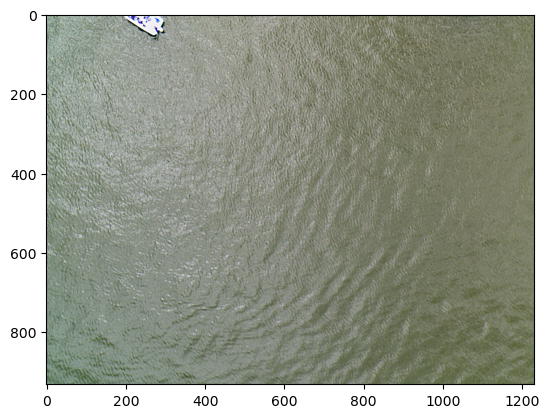

In [94]:
visualize_image_bbox("10.png")

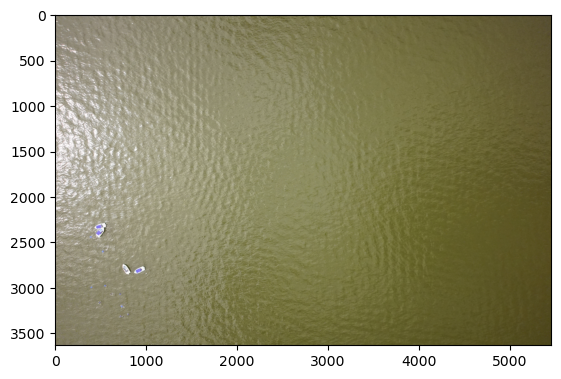

In [95]:
visualize_image_bbox("1001.png")

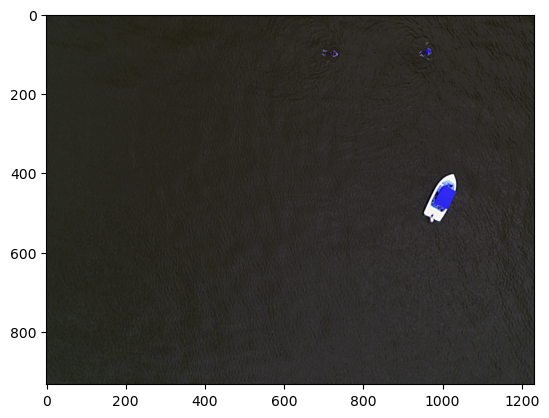

In [96]:
visualize_image_bbox("14.png")

# Count pixel bounding box size

In [97]:
def count_bbox_size(size):
    lst = []
    NUM_CLASSES = 6
    for file in tqdm(files):
        f = open(os.path.join(PATH, file)).readlines()
        for line in f:
            w = float(line.split(" ")[3])
            h = float(line.split(" ")[4])
            lst.append(int(w*h * size**2))
    fig = go.Figure(data=[go.Histogram(x=lst, nbinsx=400)])
    fig.update_layout(
        title="box area",
    )
    fig.show()
    return np.array(lst)

In [98]:
arr1536 = count_bbox_size(1536)

  0%|          | 0/2975 [00:00<?, ?it/s]

In [99]:
arr640 = count_bbox_size(640)

  0%|          | 0/2975 [00:00<?, ?it/s]

In [66]:
len(arr640[arr640 < 30])

3164

In [67]:
len(arr1536[arr1536 < 30])

57